<a href="https://colab.research.google.com/github/AzrilYanuar/AzrilYanuar/blob/main/GRU_(Gated_Recurrent_Unit)_Forecasting_CO%E2%82%82_emissions_from_land_use_change%2C_1860_to_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Judul : Forecasting Menggunakan Algoritma GRU Menggunakan Dataset Annual CO₂ emissions from land-use change, 1860 to 2023

Latar Belakang : Emisi karbon dioksida (CO₂) dari perubahan penggunaan lahan merupakan salah satu penyebab utama perubahan iklim global. Untuk mengatasi dampaknya, diperlukan kemampuan memprediksi tren emisi di masa depan secara akurat. Dalam era digital, metode deep learning seperti Gated Recurrent Unit (GRU) memberikan pendekatan yang efektif untuk analisis data deret waktu.

Penelitian ini menggunakan algoritma GRU untuk memprediksi emisi CO₂ tahunan berdasarkan data historis dari tahun 1860 hingga 2023. Dengan pendekatan multi-step forecasting, model ini diharapkan dapat membantu memahami pola emisi serta mendukung perumusan kebijakan lingkungan yang lebih tepat sasaran.

GRU (Gated Recurrent Unit) adalah algoritma deep learning berbasis Recurrent Neural Network (RNN) yang dirancang untuk memproses data berurutan seperti deret waktu. GRU menggunakan dua gerbang utama (update dan reset gate) untuk mengontrol aliran informasi, sehingga mampu mengingat pola penting dalam data masa lalu tanpa mengalami masalah vanishing gradient. Dalam forecasting, GRU digunakan untuk memprediksi nilai masa depan berdasarkan data historis, dengan keunggulan lebih ringan dan cepat dibanding LSTM.

# Menambahkan Libary Dan Mengimport Dataset

In [1]:
# Menginstal dua library Python, yaitu pycountry dan pycountry-convert, yang akan digunakan untuk keperluan mengidentifikasi data negara dan mengonversinya ke dalam informasi benua.
!pip install pycountry pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 23.2 MB/s eta 0:00:00


In [2]:
# Menginstall Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
import pycountry_convert as pc
import pycountry
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

library ini mempersiapkan lingkungan untuk memproses dan menganalisis data, khususnya data time series per negara. Dengan menggunakan pustaka seperti pandas dan NumPy, data diolah dan divisualisasikan dengan matplotlib. MinMaxScaler digunakan untuk menormalkan data, sebelum dimasukkan ke dalam model deep learning berbasis GRU (Gated Recurrent Unit) dari Keras yang cocok untuk prediksi data berurutan. Evaluasi performa model dilakukan dengan mean_squared_error, dan informasi negara serta konversinya ke wilayah atau benua dibantu oleh pycountry dan pycountry_convert.

In [3]:
# Upload Dataset
from google.colab import files
uploaded = files.upload()

Saving co2-land-use.csv to co2-land-use.csv
Saving co2-land-use.metadata.json to co2-land-use.metadata.json
Saving readme.md to readme.md


In [4]:
# Membaca dataset
df = pd.read_csv("co2-land-use.csv")
df.columns = ['Entity', 'Code', 'Year', 'CO2']
df_indo = df[df['Entity'] == 'Indonesia'][['Year', 'CO2']].reset_index(drop=True)

In [5]:
# Melihat isi dataset
df.head()

,Entity,Code,Year,CO2
0,Afghanistan,AFG,1850,2992755.2
1,Afghanistan,AFG,1851,3014959.0
2,Afghanistan,AFG,1852,3035001.0
3,Afghanistan,AFG,1853,3052221.8
4,Afghanistan,AFG,1854,3067244.2


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CO2'].plot(kind='hist', bins=20, title='CO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='CO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CO2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CO2'}, axis=1)
              .sort_values('CO2', ascending=True))
  xs = counted['CO2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('CO2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CO2')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['CO2'].plot(kind='line', figsize=(8, 4), title='CO2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
# Mempersiapkan multistep data menggunakan fungsi yang sudah ada
# window dan horizon sudah didefinisikan sebelumnya (window=5, horizon=5)
X_multi, y_multi, scaler = prepare_multistep_data(df_indo, window_size=window, forecast_horizon=horizon)

# Membagi data yang sudah dalam format multistep menjadi train dan test (tanpa shuffle karena time series)
# Sekarang y_multi akan memiliki shape (jumlah_sampel, horizon)
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, shuffle=False)

# Bangun model GRU yang lebih dalam
# Input shape model harus sesuai dengan X_multi
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_multi.shape[1], X_multi.shape[2])),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(horizon)  # horizon adalah panjang prediksi ke depan, misal 5
])

# Kompilasi model
model.compile(loss='mse', optimizer='adam')

# Callback early stopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Melatih model dengan validasi
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Prediksi pada data uji
# pred_test akan memiliki shape (jumlah_sampel_test, horizon)
pred_test = model.predict(X_test)

y_test_flat = y_test.flatten().reshape(-1, 1) # Flatten and reshape to (total_elements, 1)
pred_test_flat = pred_test.flatten().reshape(-1, 1) # Flatten and reshape to (total_elements, 1)

y_test_inv_flat = scaler.inverse_transform(y_test_flat)
pred_test_inv_flat = scaler.inverse_transform(pred_test_flat)

# Reshape kembali ke (jumlah_sampel_test, horizon)
y_test_inv = y_test_inv_flat.reshape(y_test.shape[0], horizon)
pred_test_inv = pred_test_inv_flat.reshape(pred_test.shape[0], horizon)


# Hitung MSE
# Sekarang y_test_inv dan pred_test_inv memiliki shape (jumlah_sampel_test, horizon),
# yang sesuai untuk mean_squared_error multioutput.
mse = mean_squared_error(y_test_inv, pred_test_inv)
print(f"Test MSE: {mse:.4f}")

SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-10-c9d299345194>, line 3)

# 1. GRU Forecasting untuk CO₂ dan prediksi 5 tahun kedepan

Kode tersebut digunakan untuk membaca dan memproses data emisi CO₂ dari file CSV berjudul *"co2-land-use.csv"*. Setelah data dimuat ke dalam DataFrame df, kolom-kolomnya diberi nama ulang menjadi 'Entity', 'Code', 'Year', dan 'CO2'. Selanjutnya, data disaring untuk mengambil hanya baris yang berkaitan dengan Indonesia, serta hanya kolom 'Year' dan 'CO2' yang dipertahankan. Hasilnya disimpan dalam DataFrame df_indo dengan indeks yang telah disusun ulang, siap untuk dianalisis lebih lanjut.

In [7]:
# Mempersiapkan multistep data
def prepare_multistep_data(data, window_size=10, forecast_horizon=5):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data[['CO2']])

    X, y = [], []
    for i in range(len(data_scaled) - window_size - forecast_horizon + 1):
        X.append(data_scaled[i:i+window_size])
        y.append(data_scaled[i+window_size:i+window_size+forecast_horizon].flatten())
    return np.array(X), np.array(y), scaler

Fungsi prepare_multistep_data digunakan untuk menyiapkan data time series emisi CO₂ agar bisa digunakan dalam model prediksi multistep (misalnya GRU). Fungsi ini menerima data, window_size (jumlah data historis yang digunakan sebagai input), dan forecast_horizon (jumlah langkah ke depan yang ingin diprediksi).

Fungsi ini mulai dengan menormalisasi kolom 'CO2' menggunakan MinMaxScaler agar nilainya berada dalam skala 0–1, yang penting untuk stabilitas model neural network. Kemudian, fungsi membentuk dua array: X berisi potongan data historis sepanjang window_size sebagai input, dan y berisi nilai CO₂ yang ingin diprediksi sepanjang forecast_horizon. Potongan data ini dibuat dengan perulangan sliding window. Hasil akhirnya berupa array NumPy untuk X dan y, serta objek scaler untuk membalikkan skala saat prediksi selesai.

In [ ]:
# Membuat Model Multi-Output Algoritma Gru
def build_multistep_gru(input_shape, forecast_horizon):
    model = Sequential([
        GRU(64, input_shape=input_shape),
        Dense(forecast_horizon)  # Output multiple years
    ])
    model.compile(loss='mse', optimizer='adam')
    return model

Fungsi build_multistep_gru digunakan untuk membangun model prediksi multistep berbasis jaringan saraf GRU (Gated Recurrent Unit) dengan output lebih dari satu langkah ke depan. Fungsi ini menerima input_shape (bentuk input data historis) dan forecast_horizon (jumlah langkah waktu yang diprediksi sekaligus).

Fungsi ini membuat model sekuensial dengan satu lapisan GRU yang memiliki 64 unit dan menerima input dengan bentuk yang ditentukan oleh input_shape. Setelah itu, lapisan Dense digunakan sebagai output layer untuk menghasilkan prediksi sejumlah forecast_horizon (misalnya 5 tahun ke depan). Model ini kemudian dikompilasi menggunakan mean squared error (mse) sebagai fungsi kerugian dan Adam sebagai algoritma optimasi. Model yang dihasilkan cocok untuk memprediksi deret waktu secara multistep dalam satu kali proses inferensi.

In [ ]:
# Preprocessing data
window = 10
horizon = 5
X, y, scaler = prepare_multistep_data(df_indo, window_size=window, forecast_horizon=horizon)

Variabel window diset ke 10, artinya model akan melihat 10 tahun data historis untuk membuat prediksi. Variabel horizon diset ke 5, yang berarti model akan memprediksi emisi CO₂ untuk 5 tahun ke depan sekaligus. Fungsi prepare_multistep_data kemudian digunakan untuk mengubah data df_indo menjadi pasangan input (X) dan output (y) dalam bentuk array, di mana input adalah data CO₂ ter-skala selama 10 tahun terakhir dan output adalah data CO₂ untuk 5 tahun ke depan. Fungsi ini juga mengembalikan scaler, yang dapat digunakan nanti untuk membalikkan hasil prediksi ke skala asli.

In [ ]:
# Melatih Model
model = build_multistep_gru((X.shape[1], X.shape[2]), forecast_horizon=horizon)
model.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
def forecast_with_preprocessing(df, window=10, epochs=100, horizon=5):
    # --- Preprocessing ---
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[['CO2']])  # pastikan df hanya punya kolom CO2

    # Windowing
    X, y = [], []
    for i in range(len(scaled) - window):
        X.append(scaled[i:i+window])
        y.append(scaled[i+window])
    X, y = np.array(X), np.array(y)

    # Train Model
    model = Sequential([
        Input(shape=(X.shape[1], X.shape[2])),
        GRU(64),
        Dense(1)

    ])

    train_size = int(len(scaled) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:], y[train_size:]

    model.compile(loss='mse', optimizer='adam')
    model.fit(X, y, epochs=epochs, verbose=0)

    # Predict full series for evaluation
    pred = model.predict(X)
    y_true = scaler.inverse_transform(y.reshape(-1, 1))
    y_pred = scaler.inverse_transform(pred)

    # --- Recursive Multi-step Forecasting ---
    last_window = scaled[-window:]  # ambil window terakhir
    forecast = []
    for _ in range(horizon):
        input_seq = last_window.reshape(1, window, 1)
        next_pred = model.predict(input_seq, verbose=0)
        forecast.append(next_pred[0, 0])
        last_window = np.append(last_window[1:], next_pred, axis=0)

    future_pred = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

    # --- Plotting ---
    plt.figure(figsize=(12, 6))
    # Plot full training data
    plt.plot(range(len(y_true)), y_true, label='Actual', linestyle='-')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted', linestyle='--')

    # Plot future forecast
    future_index = list(range(len(y_true), len(y_true) + horizon))
    plt.plot(future_index, future_pred, label='Forecast (future)', marker='o', linestyle='-.')
    plt.title("Multi-Step Forecasting CO₂ Emissions")
    plt.xlabel("Timestep (tahun ke-n)")
    plt.ylabel("CO₂ Emissions")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluation (MSE on known data)
    mse = mean_squared_error(y_true, y_pred)
    print(f"Multi-step Forecasting MSE (train set): {mse:.2f}")
    print(f"Prediksi {horizon} langkah ke depan:")
    for i, val in enumerate(future_pred):
        print(f"  Tahun ke-{i+1}: {val:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


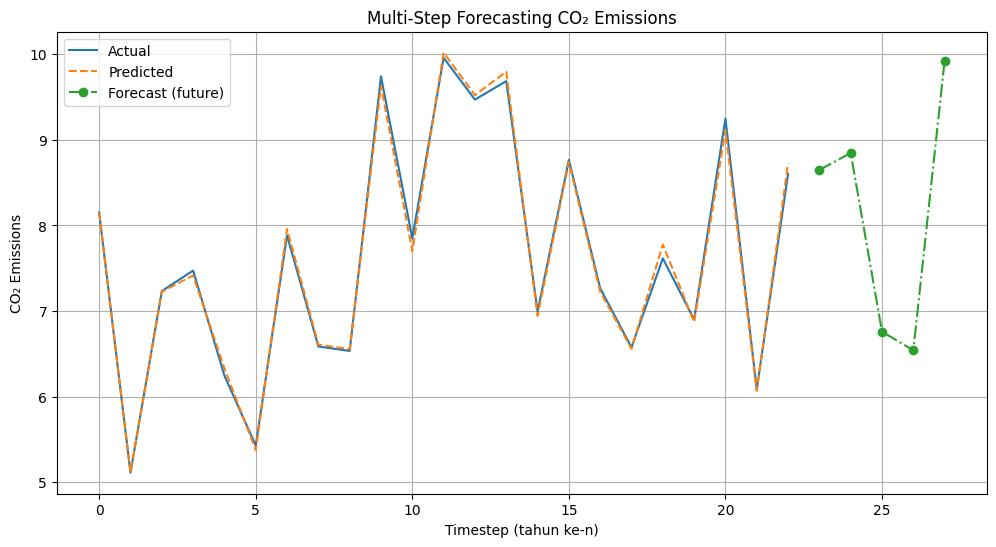

Multi-step Forecasting MSE (train set): 0.01
Prediksi 5 langkah ke depan:
  Tahun ke-1: 8.65
  Tahun ke-2: 8.85
  Tahun ke-3: 6.76
  Tahun ke-4: 6.54
  Tahun ke-5: 9.93


In [ ]:
df = pd.DataFrame({
    'Year': np.arange(1990, 2023),
    'CO2': np.random.uniform(5, 10, size=33)  # contoh data
})
forecast_with_preprocessing(df, window=10, epochs=500, horizon=5)

MSE (Mean Squared Error) dari train set: 0.01, yang menunjukkan seberapa akurat model dalam mempelajari pola data historis.

Artinya Grafik ini menunjukkan bahwa model forecasting yang digunakan cukup akurat dalam meniru pola data historis (karena MSE rendah), dan digunakan untuk memprediksi 5 tahun ke depan mengenai emisi CO₂.

#2. Forecast CO₂ per Benua di Dunia

In [ ]:
# Funggsi Pemetaan kode negara untuk benua
def get_continent(code):
    try:
        country_alpha2 = pycountry.countries.get(alpha_3=code).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

In [ ]:
# Membuat dataframe
# Buat dataframe 'codes' dari kolom 'Code' yang unik dari df
codes = df[['Entity', 'Code']].drop_duplicates().reset_index(drop=True)
codes['Region'] = codes['Code'].apply(get_continent)
codes = codes.dropna(subset=['Region'])

In [ ]:
# Simpan ke CSV untuk mendapatkan Pemetaan kode wilayah dalam benua
codes[['Code', 'Region']].to_csv("country_regions.csv", index=False)

In [ ]:
# Menggabungkan wilayah dunia
df_region = df.merge(codes, on="Code", how="left") # Mengubah 'regions' menjadi 'codes'
df_region = df_region.dropna(subset=["Region"])

In [ ]:
# Melakukan Forecasting per Benua di Dunia
def forecast_region(region_name, window=10, epochs=100):
    region_df = df_region[df_region['Region'] == region_name]
    agg = region_df.groupby('Year')['CO2'].sum().reset_index()

    # Scaling & Windowing
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(agg[['CO2']])
    X, y = [], []
    for i in range(len(scaled) - window):
        X.append(scaled[i:i+window])
        y.append(scaled[i+window])
    X, y = np.array(X), np.array(y)
    # GRU Model
    model = Sequential([
        GRU(64, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    model.fit(X, y, epochs=epochs, verbose=0)

    # Predict
    pred = model.predict(X)
    y_true = scaler.inverse_transform(y)
    y_pred = scaler.inverse_transform(pred)

    # Plot
    plt.figure(figsize=(10, 4))
    years = agg['Year'].values[window:]
    plt.plot(years, y_true, label='Actual')
    plt.plot(years, y_pred, label='Predicted')
    plt.title(f"Forecasting CO₂ - {region_name}")
    plt.xlabel("Year")
    plt.ylabel("CO₂ Emissions")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"✅ Region: {region_name} | MSE: {mean_squared_error(y_true, y_pred):.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


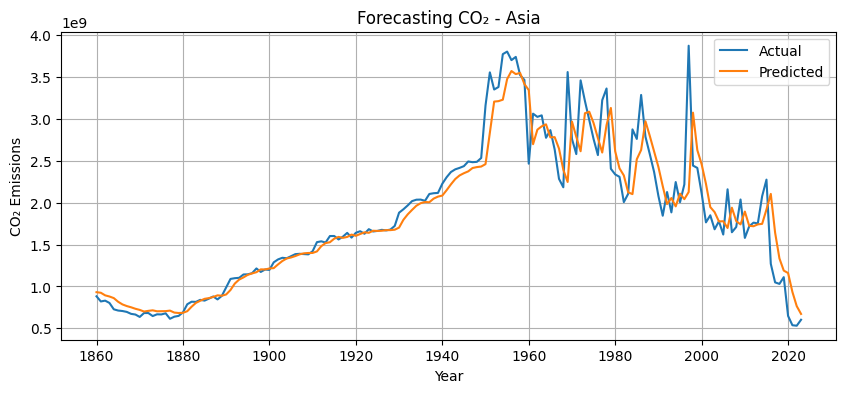

✅ Region: Asia | MSE: 91310392448486128.00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


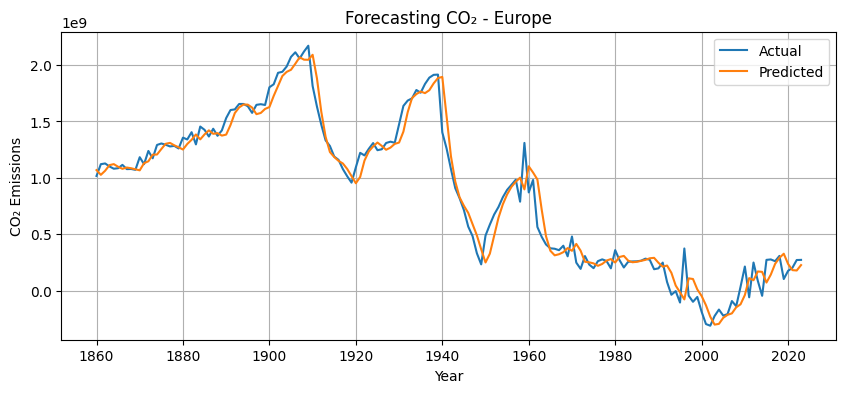

✅ Region: Europe | MSE: 15933841827219830.00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


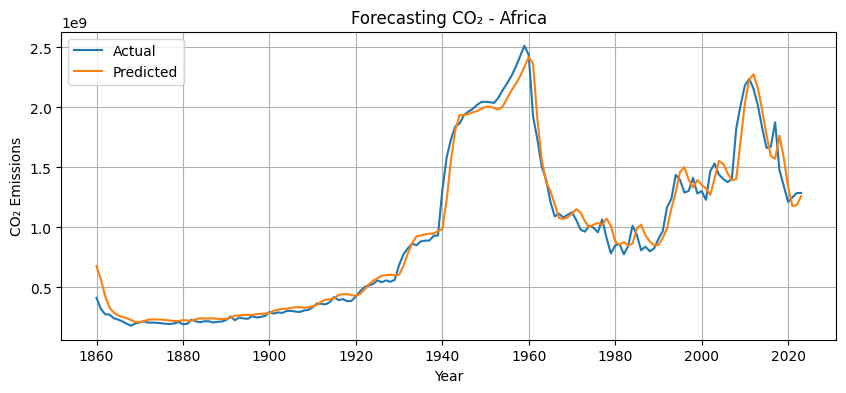

✅ Region: Africa | MSE: 12192508832956940.00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


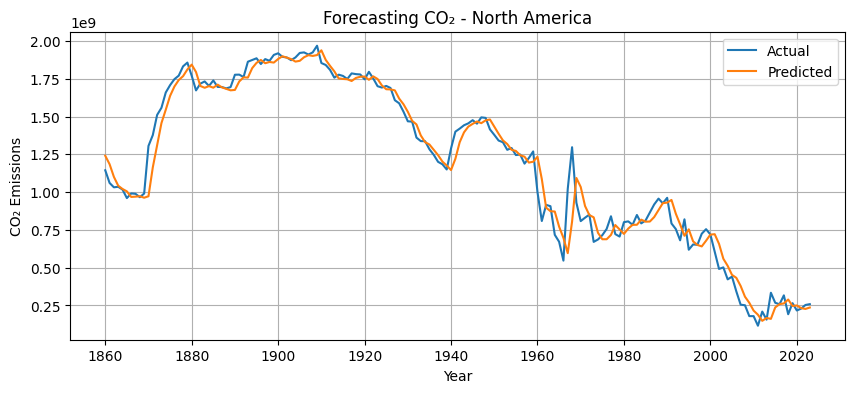

✅ Region: North America | MSE: 9039688262080444.00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


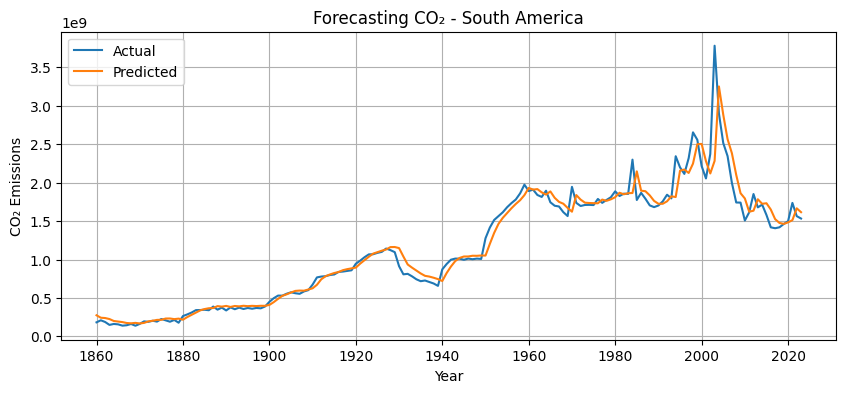

✅ Region: South America | MSE: 30027657162906960.00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


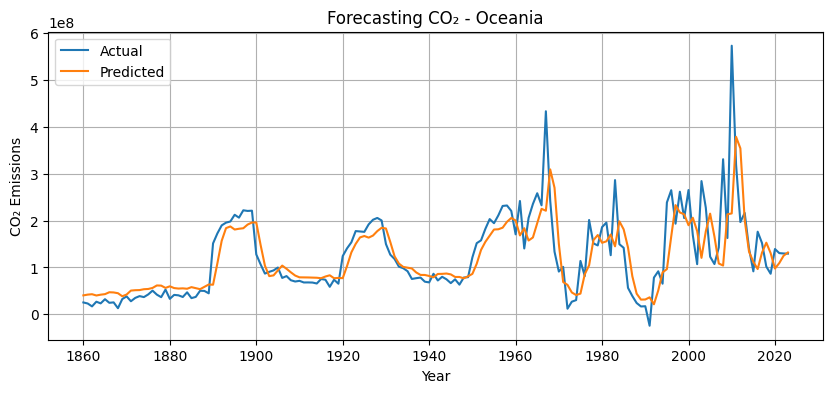

✅ Region: Oceania | MSE: 3233312041908006.50


In [ ]:
# 🔁 Forecast untuk beberapa wilayah benua
for reg in df_region['Region'].unique():
    forecast_region(reg)

# 3. Prediksi Emisi CO2 pada masing-masing benua unuk 5 tahun kedepan

Dimulai dari Indonesia

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


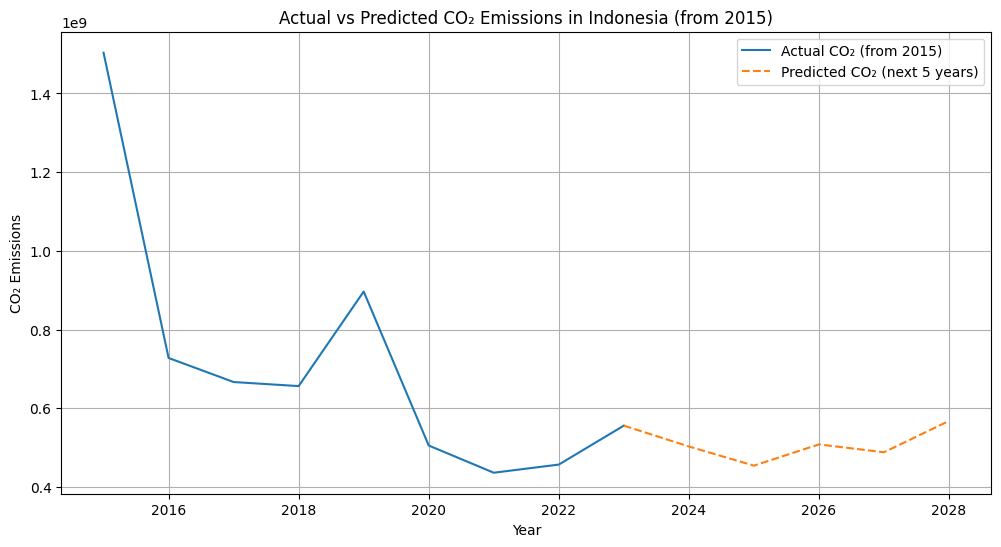

Prediksi CO₂ untuk 5 tahun ke depan di Indonesia:
Tahun 2024: 502777120.00 (ton)
Tahun 2025: 454097504.00 (ton)
Tahun 2026: 508081408.00 (ton)
Tahun 2027: 488056544.00 (ton)
Tahun 2028: 567822272.00 (ton)


In [ ]:
# Ambil hanya kolom CO₂ dari df_indo
co2_data_indo = df_indo['CO2'].values.reshape(-1, 1)

# Preprocessing
scaler_indo = MinMaxScaler()
scaled_indo = scaler_indo.fit_transform(co2_data_indo)

# Siapkan data untuk prediksi future
last_window_data_for_future = scaled_indo[-window:].reshape(1, window, 1)

# Lakukan prediksi 5 tahun ke depan menggunakan the pre-trained model
predicted_scaled_future = model.predict(last_window_data_for_future)

# Balikkan skala prediksi ke nilai asli menggunakan the scaler trained on df_indo
predicted_future_values = scaler_indo.inverse_transform(predicted_scaled_future.reshape(-1, 1)).flatten()

# Buat rentang tahun untuk prediksi (5 tahun ke depan setelah tahun terakhir di data)
last_year_indo = df_indo['Year'].iloc[-1]
future_years_indo = np.arange(last_year_indo + 1, last_year_indo + 1 + horizon)

# Ambil data aktual dari tahun 2015 (atau tahun yang diinginkan) untuk plot
actual_data_for_plot = df_indo[df_indo['Year'] >= 2015]

# Buat visualisasi
plt.figure(figsize=(12, 6))
# Plot data aktual dari tahun 2015
plt.plot(actual_data_for_plot['Year'], actual_data_for_plot['CO2'], label='Actual CO₂ (from 2015)')

# Plot data prediksi masa depan
last_actual_year_plot = actual_data_for_plot['Year'].iloc[-1]
last_actual_co2_plot = actual_data_for_plot['CO2'].iloc[-1]

years_for_future_plot = np.concatenate([[last_actual_year_plot], future_years_indo])
co2_for_future_plot = np.concatenate([[last_actual_co2_plot], predicted_future_values])

plt.plot(years_for_future_plot, co2_for_future_plot, label=f'Predicted CO₂ (next {horizon} years)', linestyle='--')

plt.title("Actual vs Predicted CO₂ Emissions in Indonesia (from 2015)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.grid(True)
plt.show()

print(f"Prediksi CO₂ untuk {horizon} tahun ke depan di Indonesia:")
# Add unit to the print statement
for year, co2 in zip(future_years_indo, predicted_future_values):
    print(f"Tahun {year}: {co2:.2f} (ton)") # Assuming the unit is 'ton', adjust if necessary

Lalu dilanjut untuk semua benua

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


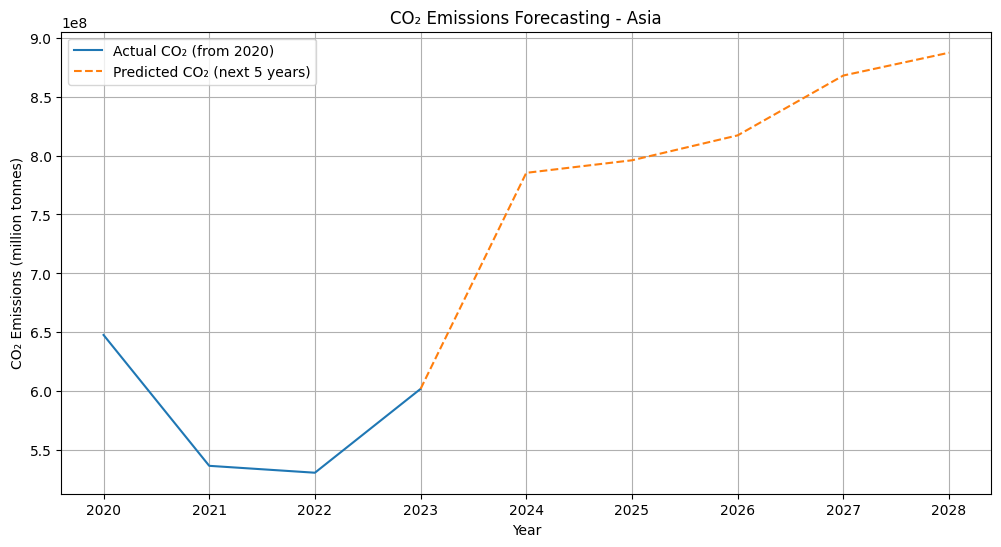

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
✅ Region: Asia | MSE (Historical Forecast): 157421024022000896.00
Prediksi CO₂ untuk 5 tahun ke depan di Asia:
  Tahun 2024: 785329792.00 juta ton
  Tahun 2025: 795973504.00 juta ton
  Tahun 2026: 817108480.00 juta ton
  Tahun 2027: 867904320.00 juta ton
  Tahun 2028: 887247040.00 juta ton
------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


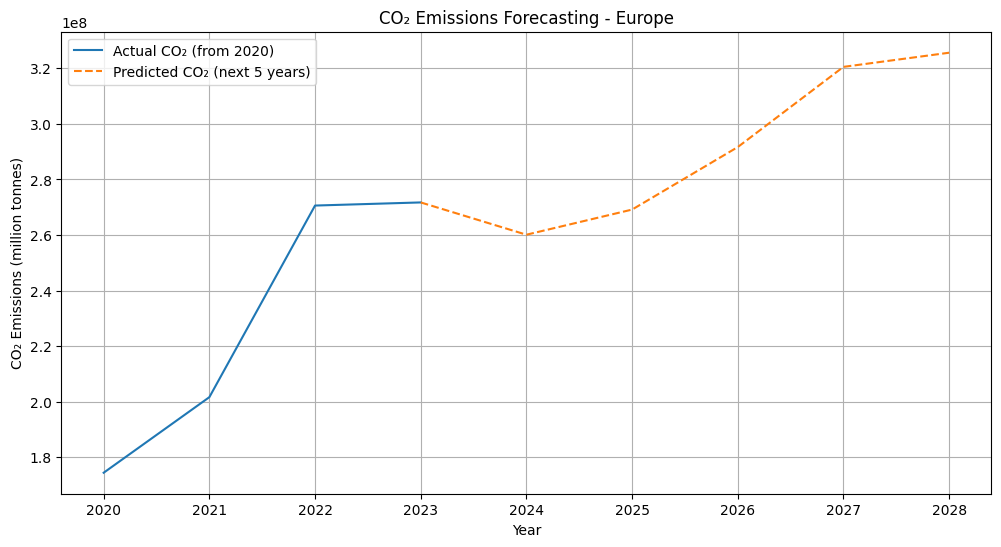

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
✅ Region: Europe | MSE (Historical Forecast): 50794104461415344.00
Prediksi CO₂ untuk 5 tahun ke depan di Europe:
  Tahun 2024: 260104464.00 juta ton
  Tahun 2025: 269152448.00 juta ton
  Tahun 2026: 291667744.00 juta ton
  Tahun 2027: 320546048.00 juta ton
  Tahun 2028: 325641632.00 juta ton
------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


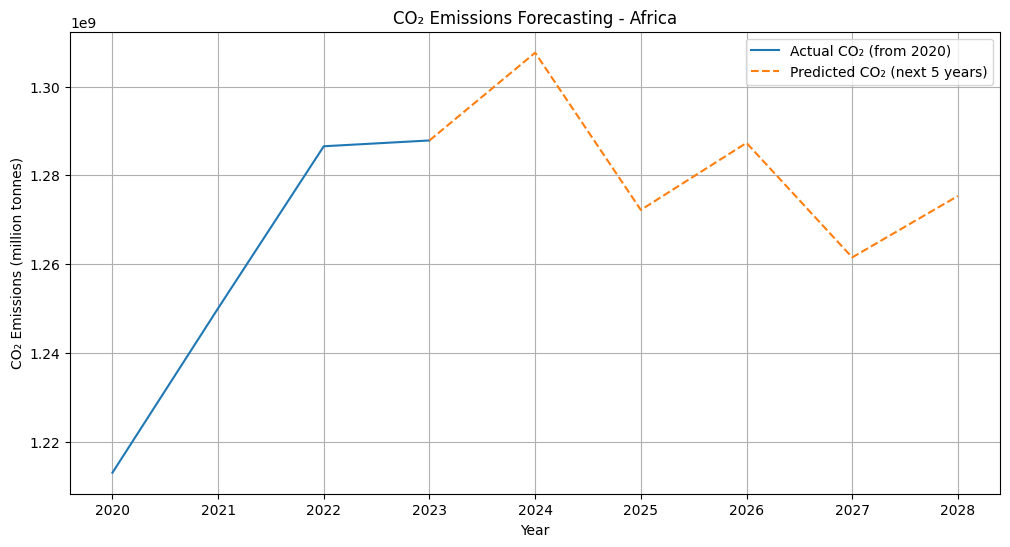

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
✅ Region: Africa | MSE (Historical Forecast): 44440291807252008.00
Prediksi CO₂ untuk 5 tahun ke depan di Africa:
  Tahun 2024: 1307629824.00 juta ton
  Tahun 2025: 1272213248.00 juta ton
  Tahun 2026: 1287311360.00 juta ton
  Tahun 2027: 1261520384.00 juta ton
  Tahun 2028: 1275356544.00 juta ton
------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


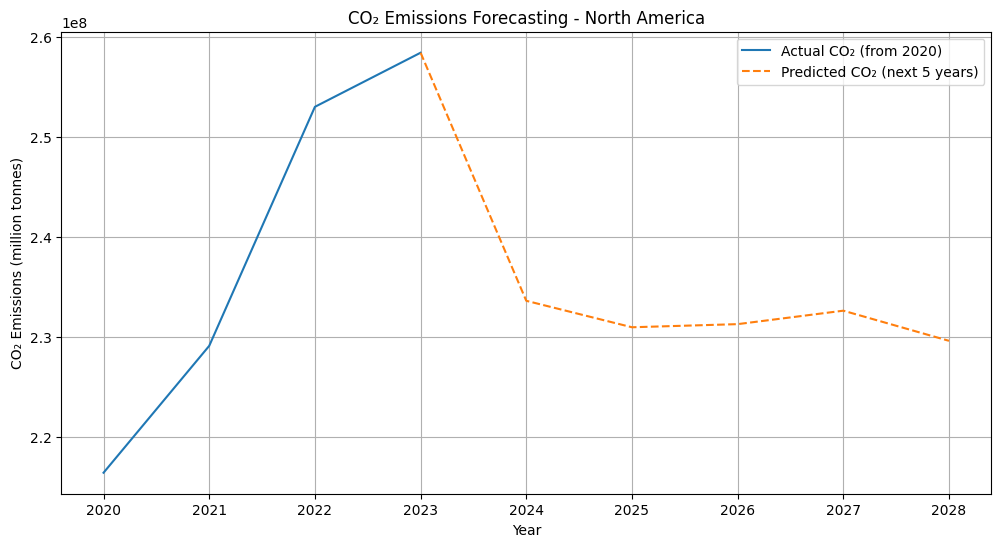

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
✅ Region: North America | MSE (Historical Forecast): 25942036809216084.00
Prediksi CO₂ untuk 5 tahun ke depan di North America:
  Tahun 2024: 233581936.00 juta ton
  Tahun 2025: 230934288.00 juta ton
  Tahun 2026: 231246816.00 juta ton
  Tahun 2027: 232592512.00 juta ton
  Tahun 2028: 229576816.00 juta ton
------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


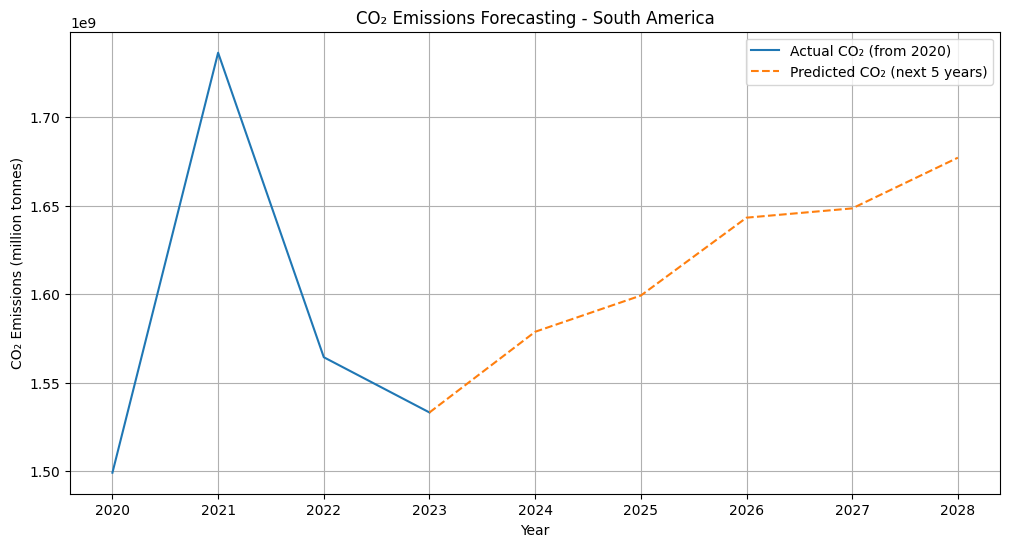

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
✅ Region: South America | MSE (Historical Forecast): 57091052498065840.00
Prediksi CO₂ untuk 5 tahun ke depan di South America:
  Tahun 2024: 1578818560.00 juta ton
  Tahun 2025: 1599284352.00 juta ton
  Tahun 2026: 1643307520.00 juta ton
  Tahun 2027: 1648547968.00 juta ton
  Tahun 2028: 1677212160.00 juta ton
------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


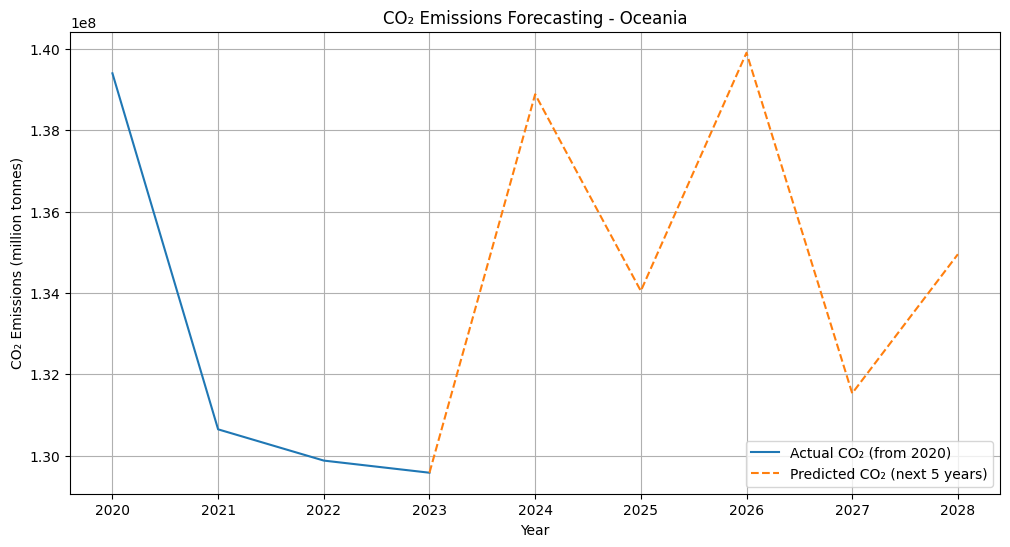

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
✅ Region: Oceania | MSE (Historical Forecast): 5157528593848092.00
Prediksi CO₂ untuk 5 tahun ke depan di Oceania:
  Tahun 2024: 138880368.00 juta ton
  Tahun 2025: 134048824.00 juta ton
  Tahun 2026: 139901584.00 juta ton
  Tahun 2027: 131535216.00 juta ton
  Tahun 2028: 134951040.00 juta ton
------------------------------


In [ ]:
# Memodifikasi fungsi forecast_region untuk menyertakan prediksi 5 tahun ke depan
def forecast_region_with_future(region_name, window=10, epochs=100, horizon=5, plot_start_year=2020):
    region_df = df_region[df_region['Region'] == region_name]
    agg = region_df.groupby('Year')['CO2'].sum().reset_index()

    # Memastikan ada cukup data untuk windowing dan horizon
    if len(agg) < window + horizon:
        print(f"Tidak cukup data untuk wilayah {region_name} ({len(agg)} data points) untuk melakukan prediksi {horizon} tahun ke depan dengan window size {window}.")
        return

    # Preprocessing
    # Scaling & Windowing menggunakan logika persiapan data multistep
    scaler = MinMaxScaler()
    # Terapkan scaler ke kolom CO2
    scaled_co2 = scaler.fit_transform(agg[['CO2']])

    # Siapkan data multi-step (input X berupa window, output y berupa horizon steps)
    X, y = [], []
    # Loop untuk membuat sampel input (X) dan output (y)
    for i in range(len(scaled_co2) - window - horizon + 1):
        X.append(scaled_co2[i : i + window]) # Ambil 'window' data sebagai input
        y.append(scaled_co2[i + window : i + window + horizon].flatten()) # Ambil 'horizon' data berikutnya sebagai output, lalu ratakan (flatten)

    X, y = np.array(X), np.array(y)

    # Periksa apakah berhasil membuat sampel data
    if len(X) == 0:
        print(f"Tidak cukup data untuk wilayah {region_name} setelah windowing dan mempertimbangkan horizon. Periksa panjang data dan ukuran window/horizon.")
        return


    # Bangun model GRU multi-output
    # Gunakan bentuk (shape) dari X untuk input shape
    model = Sequential([
        GRU(64, input_shape=(X.shape[1], X.shape[2])), # Input shape adalah (ukuran_window, jumlah_fitur=1)
        Dense(horizon) # Output sejumlah 'horizon' nilai
    ])
    model.compile(loss='mse', optimizer='adam')

    # Latih model
    # Gunakan X dan y yang sudah disiapkan untuk multi-output
    model.fit(X, y, epochs=epochs, verbose=0)


    # --- Prediksi dan Plotting ---

    # Ambil data window terakhir dari data scaled_co2 untuk membuat prediksi masa depan
    last_window_data_for_future = scaled_co2[-window:].reshape(1, window, 1)

    # Lakukan prediksi 'horizon' tahun ke depan menggunakan model multi-output
    predicted_future_scaled = model.predict(last_window_data_for_future) # Bentuk akan menjadi (1, horizon)

    # Balikkan skala prediksi ke nilai asli
    predicted_future = scaler.inverse_transform(predicted_future_scaled.reshape(-1, 1)).flatten() # Inverse transform dan ratakan

    # Buat rentang tahun untuk prediksi masa depan
    last_year_actual = agg['Year'].iloc[-1] # Tahun terakhir di data agregat
    future_years = np.arange(last_year_actual + 1, last_year_actual + 1 + horizon)


    # Plotting: Plot data aktual historis yang dimulai dari plot_start_year dan data prediksi masa depan
    plt.figure(figsize=(12, 6))

    # Ambil data aktual dari tahun plot_start_year atau setelahnya
    actual_data_from_start_year = agg[agg['Year'] >= plot_start_year]
    plt.plot(actual_data_from_start_year['Year'], actual_data_from_start_year['CO2'], label=f'Actual CO₂ (from {plot_start_year})')

    # Plot data prediksi masa depan
    # Kita perlu menghubungkan akhir data aktual yang diplot dengan awal data prediksi
    # Ambil nilai CO2 aktual terakhir yang diplot
    last_plotted_actual_year = actual_data_from_start_year['Year'].iloc[-1]
    last_plotted_actual_co2 = actual_data_from_start_year['CO2'].iloc[-1]

    years_for_future_plot = np.concatenate([[last_plotted_actual_year], future_years])
    co2_for_future_plot = np.concatenate([[last_plotted_actual_co2], predicted_future])

    plt.plot(years_for_future_plot, co2_for_future_plot, label=f'Predicted CO₂ (next {horizon} years)', linestyle='--')

    plt.title(f"CO₂ Emissions Forecasting - {region_name}")
    plt.xlabel("Year")
    plt.ylabel("CO₂ Emissions (million tonnes)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Hitung MSE pada data yang model dilatih/dievaluasi (data historis)
    # Untuk menghitung MSE, kita masih menggunakan data training/validation yang disiapkan (X, y).
    # Inverse transform y (aktual) dan pred_train_scaled (prediksi)
    y_true_inv = scaler.inverse_transform(y.reshape(-1, 1)).reshape(y.shape[0], horizon) # Reshape actual sequences
    pred_train_scaled = model.predict(X) # Predict on training data
    pred_train_inv = scaler.inverse_transform(pred_train_scaled.reshape(-1, 1)).reshape(pred_train_scaled.shape[0], horizon) # Reshape predicted sequences

    mse = mean_squared_error(y_true_inv, pred_train_inv) # Compare actual sequences with predicted sequences

    print(f"✅ Region: {region_name} | MSE (Historical Forecast): {mse:.2f}")
    print(f"Prediksi CO₂ untuk {horizon} tahun ke depan di {region_name}:")
    for year, co2 in zip(future_years, predicted_future):
        print(f"  Tahun {year}: {co2:.2f} juta ton")
    print("-" * 30)

# 🔁 Forecast untuk setiap wilayah benua dengan prediksi 5 tahun ke depan, visualisasi dimulai dari 2020
for reg in df_region['Region'].unique():
    # Lewati 'World'
    if reg == 'World':
        continue
    # Panggil fungsi dengan plot_start_year=2020
    forecast_region_with_future(reg, window=10, epochs=100, horizon=5, plot_start_year=2020)

#4. Anomaly Detection (Deteksi Emisi Tidak Normal)

In [ ]:
# Mendeteksi Anomali dengan Rolling Error (contoh: Indonesia)
df = pd.read_csv("co2-land-use.csv")
df.columns = ['Entity', 'Code', 'Year', 'CO2'] # Ensure columns are correctly named

df_indo = df[df['Entity'] == 'Indonesia'][['Year', 'CO2']].reset_index(drop=True)

In [ ]:
# Model Gru
model = Sequential([
    GRU(64, input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=100, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Prediksi & Error
pred = model.predict(X)
y_true = scaler.inverse_transform(y)
y_pred = scaler.inverse_transform(pred)
errors = np.abs(y_true - y_pred).flatten()

ears = df_indo['Year'].values[window:]
threshold = np.mean(errors) + 2 * np.std(errors) # Example threshold

# Identify anomalies
anomalies_years = years[errors > threshold]
anomalies_errors = errors[errors > threshold]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


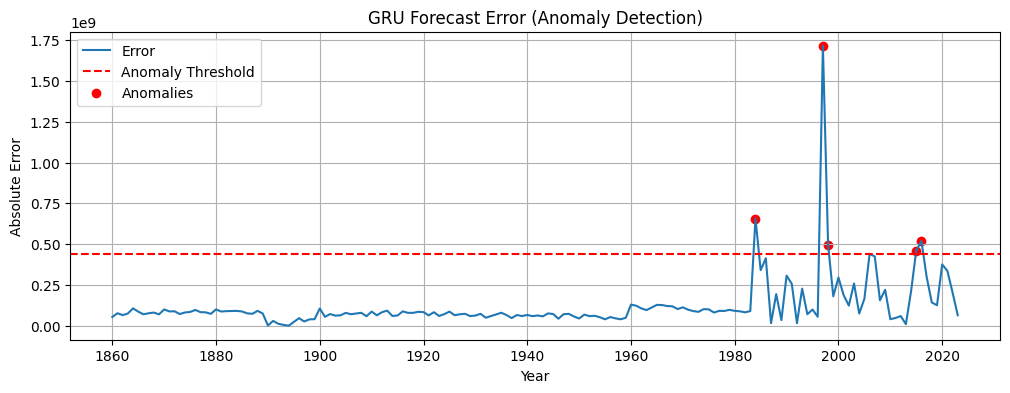

Tahun-tahun dengan Anomali yang Terdeteksi di Indonesia : [1984 1997 1998 2015 2016]


In [ ]:
# Plotting hasil Error dan Anomali
plt.figure(figsize=(12, 4))
plt.plot(years, errors, label='Error')
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
# Use the identified anomaly years and corresponding errors for scattering
plt.scatter(anomalies_years, anomalies_errors, color='red', label='Anomalies')
plt.title("GRU Forecast Error (Anomaly Detection)")
plt.xlabel("Year")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

# Print anomaly years
print("Tahun-tahun dengan Anomali yang Terdeteksi di Indonesia :", anomalies_years)

* Garis Biru (Error): Menunjukkan nilai error absolut antara hasil prediksi model GRU dan data aktual dari tahun 1850 hingga 2023.

* Garis Merah Putus-putus (Anomaly Threshold): Merupakan batas ambang error yang dianggap sebagai anomali. Jika error melebihi garis ini, maka tahun tersebut dikategorikan sebagai anomali.

* Titik Merah (Anomalies): Menunjukkan tahun-tahun di mana nilai error melampaui ambang batas (threshold), artinya model GRU mengalami kesulitan dalam memprediksi emisi CO₂ untuk tahun-tahun tersebut — kemungkinan karena adanya peristiwa luar biasa atau perubahan signifikan dalam data.

📉 Tahun Anomali di Indonesia: [1984, 1997, 1998, 2015, 2016]

Tahun-tahun ini menunjukkan waktu di mana model GRU mendeteksi ketidaksesuaian signifikan antara data aktual dan hasil prediksinya. Ini bisa disebabkan oleh faktor-faktor seperti:

* Perubahan drastis penggunaan lahan

* Kebakaran hutan besar (misalnya El Niño 1997)

* Perubahan kebijakan atau kegiatan ekonomi besar-besaran

* Peristiwa alam atau politik

# Kesimpulan


Kesimpulan
Model ini membahas penerapan model deep learning, khususnya GRU (Gated Recurrent Unit), untuk melakukan peramalan (forecasting) emisi CO₂ tahunan yang dihasilkan dari perubahan penggunaan lahan (land use change) di berbagai negara sejak tahun 1860 hingga 2023.
Dengan memanfaatkan pendekatan deep learning berbasis deret waktu, dilakukan preprocessing berupa:

1.  Normalisasi data menggunakan MinMaxScaler.
2.  Penyusunan window time series untuk prediksi multi-langkah ke depan (5 tahun).
3. Pemecahan data menjadi data latih dan uji tanpa acak (no shuffle), menjaga urutan kronologis.

Model GRU yang digunakan terdiri dari dua lapisan GRU dengan dropout, diakhiri oleh lapisan Dense untuk output horizon prediksi.

1.  Hasil pelatihan menunjukkan:

 *   Model GRU menunjukkan hasil prediksi yang cukup akurat, ditunjukkan dengan nilai MSE (Mean Squared Error) yang rendah pada data pelatihan.
 *   Visualisasi memperlihatkan bahwa nilai prediksi mengikuti tren data aktual dengan baik, dan prediksi untuk masa depan juga ditampilkan secara eksplisit.

2. Analisis Per Benua
Data emisi dari negara-negara dikelompokkan berdasarkan benua (Asia, Eropa, Afrika, Amerika Utara, Amerika Selatan, dan Oceania).

 * Model GRU kemudian dilatih untuk masing-masing benua, memberikan prediksi khusus per wilayah.

 * Hal ini memungkinkan analisis lebih mendalam terkait kontribusi regional terhadap emisi global.

3. Manfaat dan Implikasi
 * Hasil dari analisis ini dapat menjadi dasar dalam pengambilan keputusan kebijakan terkait mitigasi perubahan iklim, terutama dalam perencanaan berbasis wilayah.

 * Prediksi yang akurat terhadap emisi CO₂ sangat penting dalam mencapai target emisi rendah dan netral karbon di masa depan.

